## **ETL HOMICIDIOS**

In [51]:
# Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import locale
import numpy as np

Cargamos los datos 

In [3]:
# Cargar datos de víctimas de homicidios desde el archivo Excel
homicidios_victimas = pd.read_excel("data/homicidios.xlsx", sheet_name="VICTIMAS")

# Cargar datos de hechos relacionados con homicidios desde el mismo archivo Excel
homicidios_hechos = pd.read_excel("data/homicidios.xlsx", sheet_name="HECHOS")

Tenemos que hace un merge asi que procedemos a ver la columna en comun para hacerla

In [4]:
homicidios_hechos.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [5]:
homicidios_victimas.columns

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

Vemos que el dataframe homicidios_victimas tiene diferente el ID asi que lo cambiamos para poder hacer el merge

In [6]:
# Cambiamos el nombre de la columna
homicidios_victimas.rename(columns={"ID_hecho": "ID"}, inplace=True)
# Realizar el merge utilizando la columna en común "ID" y nombramos homicidios al dataframe resultante
homicidios = pd.merge(homicidios_hechos, homicidios_victimas, on='ID')

Observamos las columnas y vemos que los nombres de las columnas cambiaron asi que las corregimos 

In [7]:
homicidios.columns

Index(['ID', 'N_VICTIMAS', 'FECHA_x', 'AAAA_x', 'MM_x', 'DD_x', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA_x', 'ACUSADO', 'FECHA_y', 'AAAA_y', 'MM_y',
       'DD_y', 'ROL', 'VICTIMA_y', 'SEXO', 'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

In [8]:
# Convertir los nombres de las columnas a minúsculas
homicidios.columns = homicidios.columns.str.lower()

In [9]:
homicidios.columns

Index(['id', 'n_victimas', 'fecha_x', 'aaaa_x', 'mm_x', 'dd_x', 'hora', 'hh',
       'lugar_del_hecho', 'tipo_de_calle', 'calle', 'altura', 'cruce',
       'dirección normalizada', 'comuna', 'xy (caba)', 'pos x', 'pos y',
       'participantes', 'victima_x', 'acusado', 'fecha_y', 'aaaa_y', 'mm_y',
       'dd_y', 'rol', 'victima_y', 'sexo', 'edad', 'fecha_fallecimiento'],
      dtype='object')

In [10]:
# Cambiamos el nombre de algunas columna para mas comodidad
homicidios.rename(columns={"fecha_x":"fecha","aaaa_x":"año","mm_x":"mes","dd_x":"dia","hh":"hora_del_dia","dirección normalizada":"direccion","xy (caba)":"xy_caba","pos x":"pos_x","pos y":"pos_y","victima_x":"victima"}, inplace=True)

Eliminamos columnas duplicadas

In [11]:
homicidios.drop(columns={'fecha_y', 'aaaa_y', 'mm_y', 'dd_y', 'victima_y'}, inplace=True)

Verificamos las columnas con nulos

In [12]:
homicidios.isna().sum()

id                       0
n_victimas               0
fecha                    0
año                      0
mes                      0
dia                      0
hora                     0
hora_del_dia             0
lugar_del_hecho          0
tipo_de_calle            0
calle                    1
altura                 584
cruce                  177
direccion                9
comuna                   0
xy_caba                  0
pos_x                    0
pos_y                    0
participantes            0
victima                  0
acusado                  0
rol                      0
sexo                     0
edad                     0
fecha_fallecimiento      0
dtype: int64

In [13]:
# Eliminamos la columna "altura"
homicidios.drop(columns=["altura"], inplace=True)

Verificamos si existen duplicados

In [14]:
homicidios.duplicated().sum()

0

In [15]:
homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   717 non-null    object        
 1   n_victimas           717 non-null    int64         
 2   fecha                717 non-null    datetime64[ns]
 3   año                  717 non-null    int64         
 4   mes                  717 non-null    int64         
 5   dia                  717 non-null    int64         
 6   hora                 717 non-null    object        
 7   hora_del_dia         717 non-null    object        
 8   lugar_del_hecho      717 non-null    object        
 9   tipo_de_calle        717 non-null    object        
 10  calle                716 non-null    object        
 11  cruce                540 non-null    object        
 12  direccion            708 non-null    object        
 13  comuna               717 non-null  

In [16]:
# Limpiar y convertir la columna hora_del_dia
homicidios["hora_del_dia"] = pd.to_numeric(homicidios["hora_del_dia"], errors="coerce").fillna(0).astype("Int64")

In [17]:
# Limpiar y convertir 'pos_x'
homicidios['pos_x'] = pd.to_numeric(homicidios['pos_x'].str.replace(',', '.', regex=True), errors='coerce').fillna(0.0)

# Limpiar y convertir 'pos_y'
homicidios['pos_y'] = pd.to_numeric(homicidios['pos_y'].str.replace(',', '.', regex=True), errors='coerce').fillna(0.0)


In [18]:
edades_unicas = homicidios['edad'].unique()
print(edades_unicas)

[19 70 30 18 29 22 16 59 65 34 41 50 38 21 52 36 20 54 'SD' 56 24 78 79 26
 57 37 58 23 60 42 53 51 40 87 76 75 35 80 43 45 67 27 55 49 81 25 33 46
 83 39 28 7 48 4 82 32 17 47 61 10 95 73 84 66 85 1 15 13 77 44 31 62 74
 71 11 86 69 72 12 63 92 68 91 64 5 88]


In [19]:
# Reemplazar 'SD' por 0 y convertir a entero
homicidios['edad'] = pd.to_numeric(homicidios['edad'].replace('SD', "0"))

# Calcular el promedio de edad excluyendo ceros
promedio_edad = homicidios.loc[homicidios['edad'] > 0, 'edad'].mean()

# Imputar la edad por el promedio
homicidios['edad'].replace(0, promedio_edad, inplace=True)

In [20]:
# Convertir la columna 'fecha_fallecimiento' a tipo de dato datetime y manejar errores
homicidios['fecha_fallecimiento'] = pd.to_datetime(homicidios['fecha_fallecimiento'], errors='coerce')

# Asegúrandome de que 'fecha' sea de tipo datetime
homicidios['fecha'] = pd.to_datetime(homicidios['fecha'], errors='coerce')

# Rellena los valores faltantes en 'fecha_fallecimiento' con 'fecha'
homicidios['fecha_fallecimiento'].fillna(homicidios['fecha'], inplace=True)

In [21]:
# Vemos el unico registro donde la columna "calle" es nula , y hay varias columnas sin dato 
homicidios[homicidios["calle"].isna() == True]
# Asi que aprovechando esto , eliminamos el registro
homicidios.dropna(subset=['calle'], inplace=True)

In [22]:
# LLenaremos los datos nulos de esta columna con el string "SinCruce"
homicidios.cruce.fillna('SinCruce', inplace=True)

In [23]:
# Nos queda el la columna "direccion" con nulos
homicidios[homicidios['direccion'].isna() == True]

,id,n_victimas,fecha,año,mes,dia,hora,hora_del_dia,lugar_del_hecho,tipo_de_calle,...,xy_caba,pos_x,pos_y,participantes,victima,acusado,rol,sexo,edad,fecha_fallecimiento
39,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,Point (. .),0.0,0.0,MOTO-SD,MOTO,SD,SD,SD,42.167169,2016-04-20
108,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,...,Point (. .),0.0,0.0,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,SD,42.167169,2016-10-25
186,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,Point (. .),0.0,0.0,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,46.000000,2017-04-28
187,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,Point (. .),0.0,0.0,MOTO-CARGAS,MOTO,CARGAS,PASAJERO_ACOMPAÑANTE,MASCULINO,16.000000,2017-04-28
188,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,...,Point (. .),0.0,0.0,AUTO-AUTO,AUTO,AUTO,CONDUCTOR,MASCULINO,33.000000,2017-05-01
327,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,...,Point (. .),0.0,0.0,PEATON-AUTO,PEATON,AUTO,PEATON,MASCULINO,37.000000,2018-04-21
564,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,...,Point (. .),0.0,0.0,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO,CONDUCTOR,MASCULINO,28.000000,2020-05-17
642,2021-0023,1,2021-03-01,2021,3,1,09:20:00,9,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA,...,Point (. .),0.0,0.0,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,24.000000,2021-03-01


In [24]:
# Filtrar las filas donde 'direccion' es nula y mostrar solo 'direccion' y 'calle'
filas_con_direccion_nula = homicidios[homicidios["direccion"].isna()][["direccion", "calle"]]
print(filas_con_direccion_nula)


    direccion                                 calle
39        NaN                 LUGONES, LEOPOLDO AV.
108       NaN     AUTOPISTA BUENOS AIRES - LA PLATA
186       NaN               AUTOPISTA PERITO MORENO
187       NaN               AUTOPISTA PERITO MORENO
188       NaN  AUTOPISTA DELLEPIANE LUIS TTE. GRAL.
327       NaN                 LUGONES, LEOPOLDO AV.
564       NaN                 LUGONES, LEOPOLDO AV.
642       NaN     AUTOPISTA BUENOS AIRES - LA PLATA


In [25]:
# Rellenamos los nulos de "direccion" con los datos de "calle" y asi acabamos con los nulos
homicidios["direccion"].fillna(homicidios["calle"], inplace=True)

In [26]:
# Vemos los tipos de datos y cambiamos los necesarios
homicidios.dtypes

id                             object
n_victimas                      int64
fecha                  datetime64[ns]
año                             int64
mes                             int64
dia                             int64
hora                           object
hora_del_dia                    Int64
lugar_del_hecho                object
tipo_de_calle                  object
calle                          object
cruce                          object
direccion                      object
comuna                          int64
xy_caba                        object
pos_x                         float64
pos_y                         float64
participantes                  object
victima                        object
acusado                        object
rol                            object
sexo                           object
edad                          float64
fecha_fallecimiento    datetime64[ns]
dtype: object

In [27]:
# Lista de columnas a convertir a 'category'
columnas_a_convertir = ['tipo_de_calle', 'participantes', 'victima', 'acusado', 'rol', 'sexo']

# Convertir las columnas a 'category'
homicidios[columnas_a_convertir] = homicidios[columnas_a_convertir].astype("category")

# Convertir columna 'edad' a int
homicidios['edad'] = homicidios['edad'].astype(int)

In [28]:
# Definir los límites de los rangos etarios
limites_edad = [0, 10, 20, 30, 40, 50, 60, 70, float('inf')]

# Definir las etiquetas de los rangos etarios correspondientes a cada rango definido por los límites
rango_etario = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Utilizar la función cut de pandas para crear una nueva columna 'rango_etario' basada en la columna 'edad'
homicidios['rango_etario'] = pd.cut(homicidios['edad'], bins=limites_edad, labels=rango_etario, right=False)

In [29]:
homicidios.columns

Index(['id', 'n_victimas', 'fecha', 'año', 'mes', 'dia', 'hora',
       'hora_del_dia', 'lugar_del_hecho', 'tipo_de_calle', 'calle', 'cruce',
       'direccion', 'comuna', 'xy_caba', 'pos_x', 'pos_y', 'participantes',
       'victima', 'acusado', 'rol', 'sexo', 'edad', 'fecha_fallecimiento',
       'rango_etario'],
      dtype='object')

In [30]:
tipo_calle_unico = homicidios['tipo_de_calle'].unique()
print(tipo_calle_unico)

['AVENIDA', 'GRAL PAZ', 'CALLE', 'AUTOPISTA']
Categories (4, object): ['AUTOPISTA', 'AVENIDA', 'CALLE', 'GRAL PAZ']


##                                     EDA

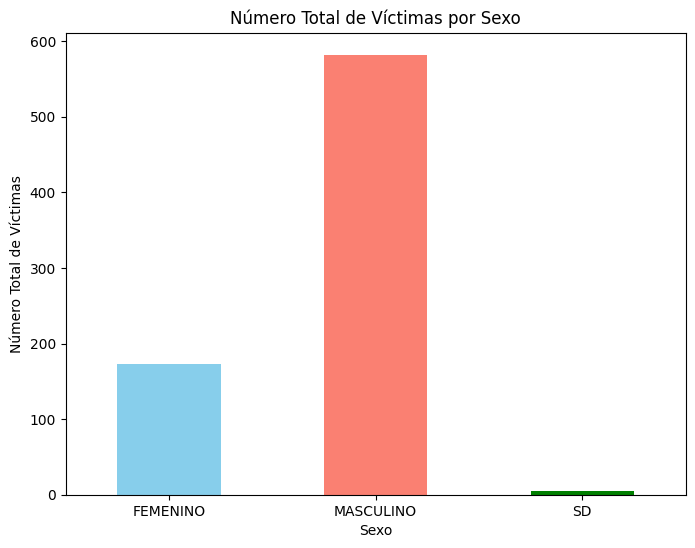

In [31]:
# Contar el número total de víctimas por sexo
victimas_por_sexo = homicidios.groupby('sexo')['n_victimas'].sum()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
victimas_por_sexo.plot(kind='bar', color=['skyblue', 'salmon', 'green'])
plt.title('Número Total de Víctimas por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número Total de Víctimas')
plt.xticks(rotation=0)
plt.show()

El gráfico de barras revela claramente que el género masculino presenta un mayor número total de víctimas en siniestros viales en comparación con el género femenino. La disparidad en las barras refleja una tendencia donde los hombres son más afectados por estos incidentes, resaltando la importancia de considerar medidas de seguridad específicas para este grupo demográfico.

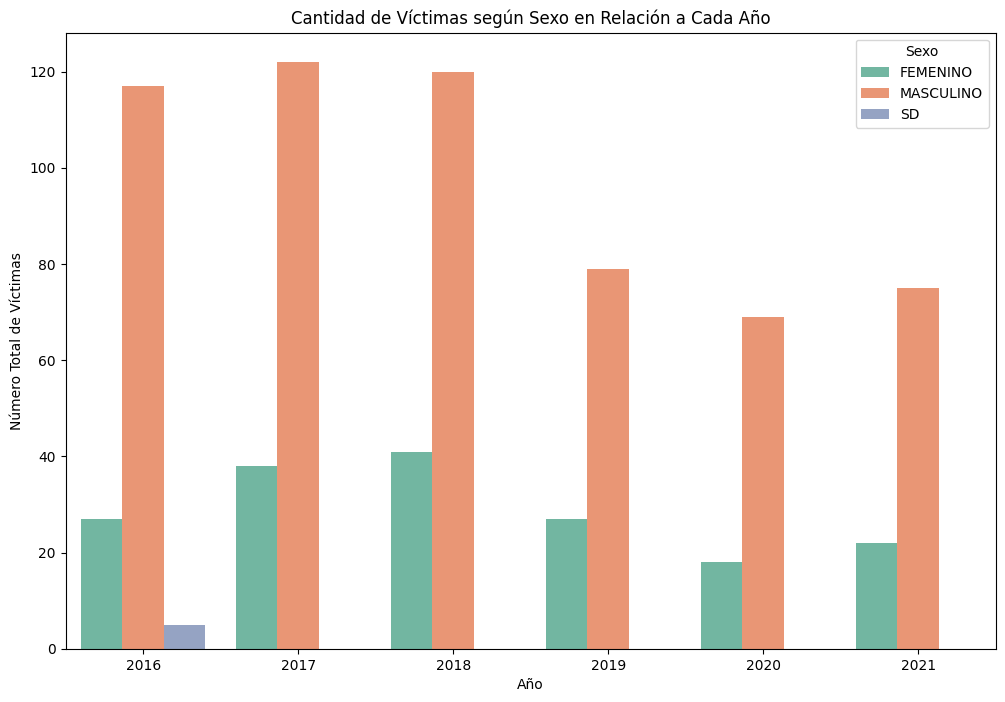

In [32]:
# Agrupar por año y sexo y sumar el número total de víctimas
victimas_por_ano_sexo = homicidios.groupby(['año', 'sexo'])['n_victimas'].sum().reset_index()

# Crear un gráfico de barras agrupadas
plt.figure(figsize=(12, 8))
sns.barplot(x='año', y='n_victimas', hue='sexo', data=victimas_por_ano_sexo, palette='Set2')
plt.title('Cantidad de Víctimas según Sexo en Relación a Cada Año')
plt.xlabel('Año')
plt.ylabel('Número Total de Víctimas')
plt.legend(title='Sexo')
plt.show()

El gráfico de barras agrupadas por año y sexo indica que, a lo largo de los años, el número de víctimas en siniestros viales varía significativamente entre géneros. Se observa claramente la tendencia temporal y permite identificar cómo la cantidad de víctimas evoluciona para hombres y mujeres, proporcionando información valiosa para la implementación de estrategias específicas de seguridad vial.

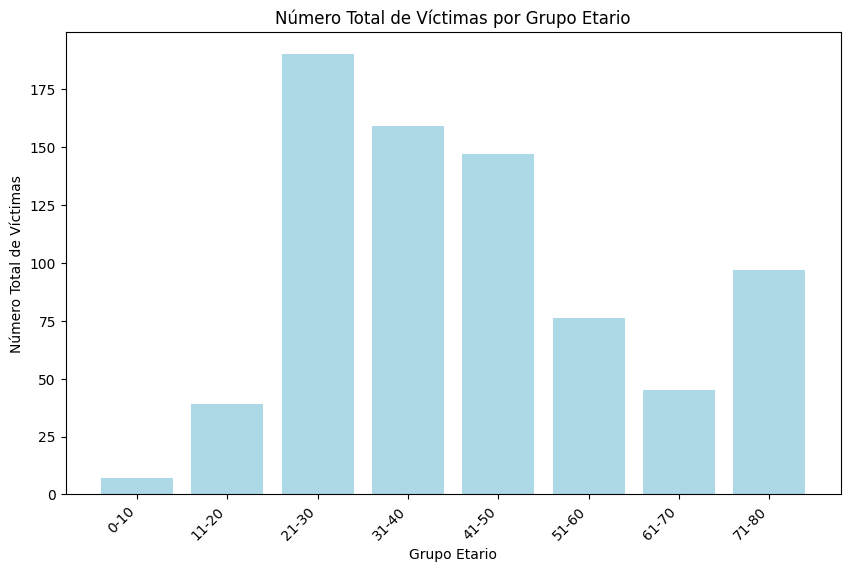

In [33]:
# Agrupar por grupo etario y sumar el número total de víctimas
victimas_por_grupo_etario = homicidios.groupby('rango_etario')['n_victimas'].sum().reset_index()

# Ordenar los datos por el rango etario
victimas_por_grupo_etario = victimas_por_grupo_etario.sort_values(by='rango_etario')

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(victimas_por_grupo_etario['rango_etario'], victimas_por_grupo_etario['n_victimas'], color='lightblue')
plt.title('Número Total de Víctimas por Grupo Etario')
plt.xlabel('Grupo Etario')
plt.ylabel('Número Total de Víctimas')
plt.xticks(rotation=45, ha='right')
plt.show()

El gráfico de barras muestra claramente que el grupo etario de 21 a 30 años es el más afectado por siniestros viales, ya que presenta el mayor número total de víctimas. Esta información destaca la importancia de dirigir medidas de seguridad y concientización específicamente hacia este rango de edad para reducir la incidencia de siniestros viales y sus consecuencias.

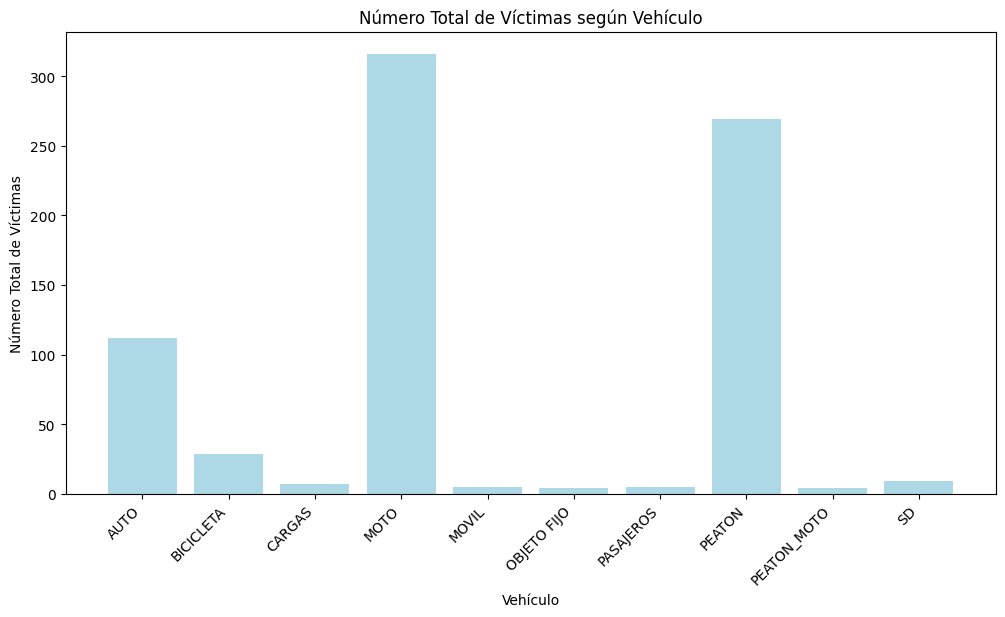

In [34]:
# Agrupar por vehículo (columna 'victima') y sumar el número total de víctimas (columna 'n_victimas')
victimas_por_vehiculo = homicidios.groupby('victima')['n_victimas'].sum().reset_index()

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(victimas_por_vehiculo['victima'], victimas_por_vehiculo['n_victimas'], color='lightblue')
plt.title('Número Total de Víctimas según Vehículo')
plt.xlabel('Vehículo')
plt.ylabel('Número Total de Víctimas')
plt.xticks(rotation=45, ha='right')
plt.show()

El gráfico de barras revela claramente que las víctimas que más sufren los siniestros viales son los motociclistas, seguidos por peatones y ocupantes de automóviles. Esta información resalta la necesidad de medidas específicas de seguridad y concientización dirigidas a usuarios de motocicletas, así como a peatones y conductores de automóviles, con el objetivo de reducir el número de víctimas en cada categoría de vehículo.

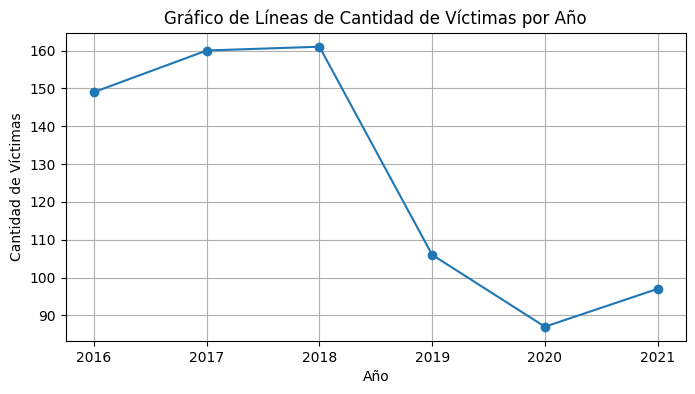

In [35]:
victimas_año = homicidios.groupby('año')['n_victimas'].sum()

plt.figure(figsize=(8, 4)) 
plt.plot(victimas_año.index, victimas_año.values, marker='o', linestyle='-')
plt.xlabel('Año')
plt.ylabel('Cantidad de Víctimas')
plt.title('Gráfico de Líneas de Cantidad de Víctimas por Año')
plt.grid(True)

plt.show()

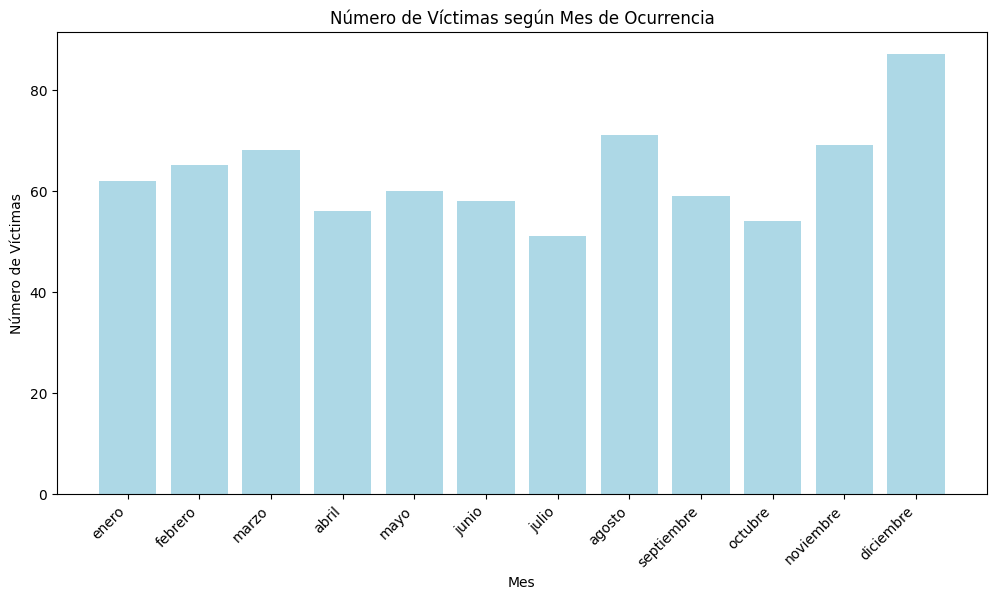

In [57]:
# Establecer la configuración regional a español
locale.setlocale(locale.LC_TIME, 'es_ES')

# Mapear los números de mes a nombres de mes en español con orden personalizado
orden_meses = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
homicidios['nombre_mes'] = homicidios['mes'].apply(lambda x: calendar.month_name[x])

# Contar el número de víctimas por mes y ordenarlos
victimas_por_mes = homicidios.groupby('nombre_mes')['n_victimas'].sum().reindex(orden_meses).reset_index()

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(victimas_por_mes['nombre_mes'], victimas_por_mes['n_victimas'], color='lightblue')
plt.title('Número de Víctimas según Mes de Ocurrencia')
plt.xlabel('Mes')
plt.ylabel('Número de Víctimas')
plt.xticks(rotation=45, ha='right')
plt.show()

El análisis del gráfico de barras revela que el mes de diciembre registra el mayor número de víctimas de siniestros viales en el período analizado. Esta observación destaca la importancia de prestar una atención especial a las medidas de seguridad vial durante ese mes, posiblemente asociado a factores estacionales o eventos específicos.

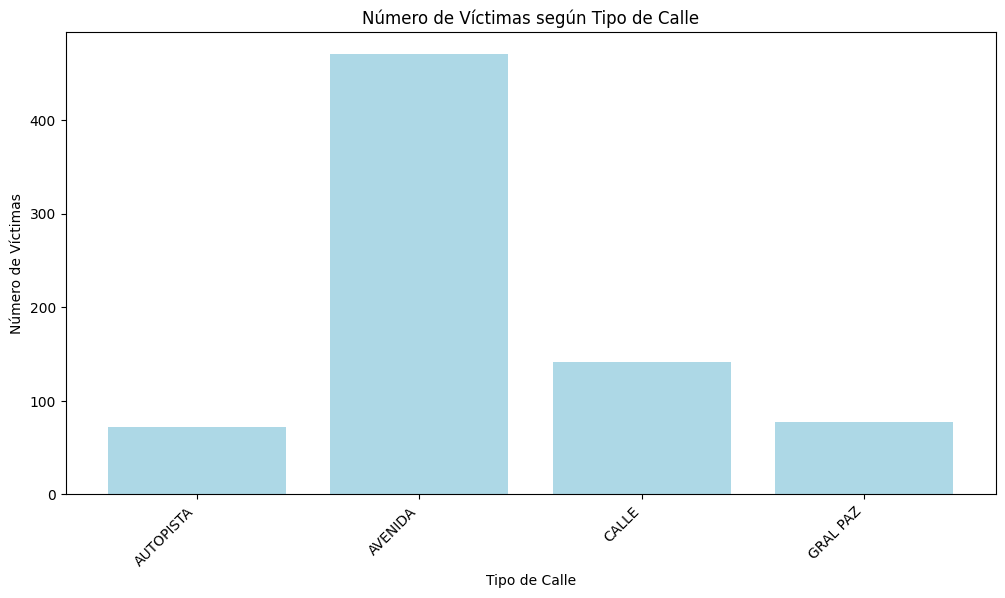

In [37]:
# Agrupar por tipo de calle y sumar el número total de víctimas
victimas_por_tipo_de_calle = homicidios.groupby('tipo_de_calle')['n_victimas'].sum().reset_index()

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(victimas_por_tipo_de_calle['tipo_de_calle'], victimas_por_tipo_de_calle['n_victimas'], color='lightblue')
plt.title('Número de Víctimas según Tipo de Calle')
plt.xlabel('Tipo de Calle')
plt.ylabel('Número de Víctimas')
plt.xticks(rotation=45, ha='right')
plt.show()

El gráfico de barras sugiere que la mayoría de los siniestros viales con víctimas ocurren en avenidas, ya que esta categoría de calles presenta el mayor número total de víctimas. Esta información destaca la importancia de enfocar esfuerzos y medidas de seguridad vial específicas en las avenidas para abordar y reducir la incidencia de siniestros en estas áreas específicas de la infraestructura vial.

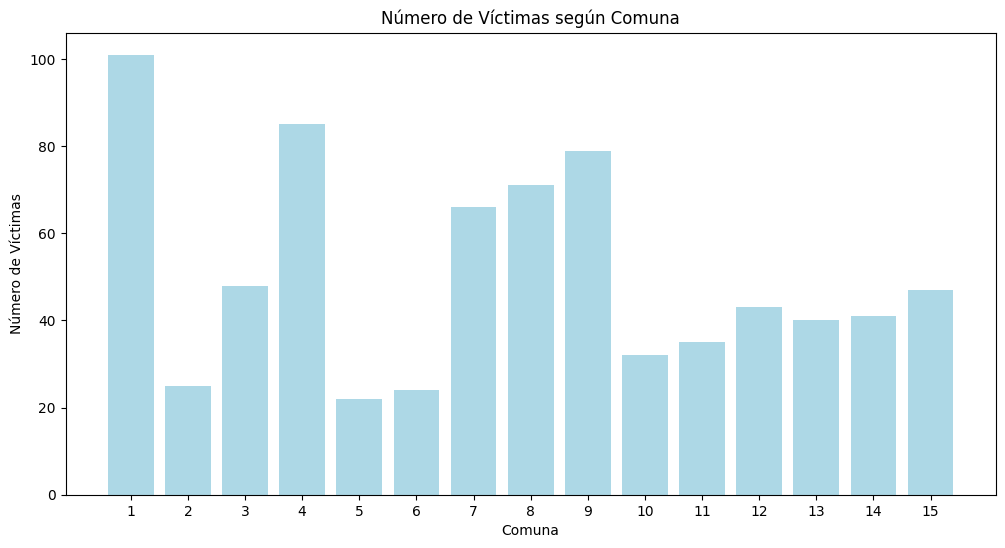

In [38]:
# Obtener el rango completo de comunas excluyendo el 0
rango_comunas = range(1, homicidios['comuna'].max() + 1)

# Crear un DataFrame con todas las comunas del rango
todas_comunas = pd.DataFrame({'comuna': rango_comunas})

# Fusionar el DataFrame de todas las comunas con el DataFrame original para incluir ceros
victimas_por_comuna = todas_comunas.merge(homicidios.groupby('comuna')['n_victimas'].sum().reset_index(),
                                          on='comuna', how='left').fillna(0)

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(victimas_por_comuna['comuna'], victimas_por_comuna['n_victimas'], color='lightblue')
plt.title('Número de Víctimas según Comuna')
plt.xlabel('Comuna')
plt.ylabel('Número de Víctimas')
plt.xticks(victimas_por_comuna['comuna'])
plt.show()

El gráfico de barras ilustra la distribución del número de víctimas de siniestros viales por comuna. Claramente, la comuna 1 presenta el mayor número de víctimas, mientras que la comuna 5 tiene la menor incidencia de siniestros. Este análisis proporciona información valiosa para focalizar estrategias específicas de seguridad vial y asignar recursos de manera efectiva en áreas con mayor necesidad de intervención.

In [39]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [40]:
# Mapa con la ubicación de los siniestros

import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# Crear un mapa centrado en la ubicación promedio
mapa = folium.Map(location=[homicidios['pos_y'].mean(), homicidios['pos_x'].mean()], zoom_start=12)

# Agregar los marcadores al mapa
marker_cluster = MarkerCluster().add_to(mapa)

for index, row in homicidios.iterrows():
    folium.Marker([row['pos_y'], row['pos_x']], popup=f'Ubicación: {row["pos_y"]}, {row["pos_x"]}').add_to(marker_cluster)

# Mostrar el mapa directamente en el cuaderno
display(mapa)

El mapa proporciona una visualización clara y geográfica de todos los puntos donde ocurrieron los siniestros viales. La ubicación de cada siniestro está marcada con un punto en el mapa, lo que facilita la identificación de patrones de concentración o dispersión. Este tipo de representación espacial puede ser útil para analizar áreas específicas con mayor incidencia de siniestros, lo que podría contribuir a la planificación de medidas de seguridad vial y la asignación eficiente de recursos en zonas críticas.

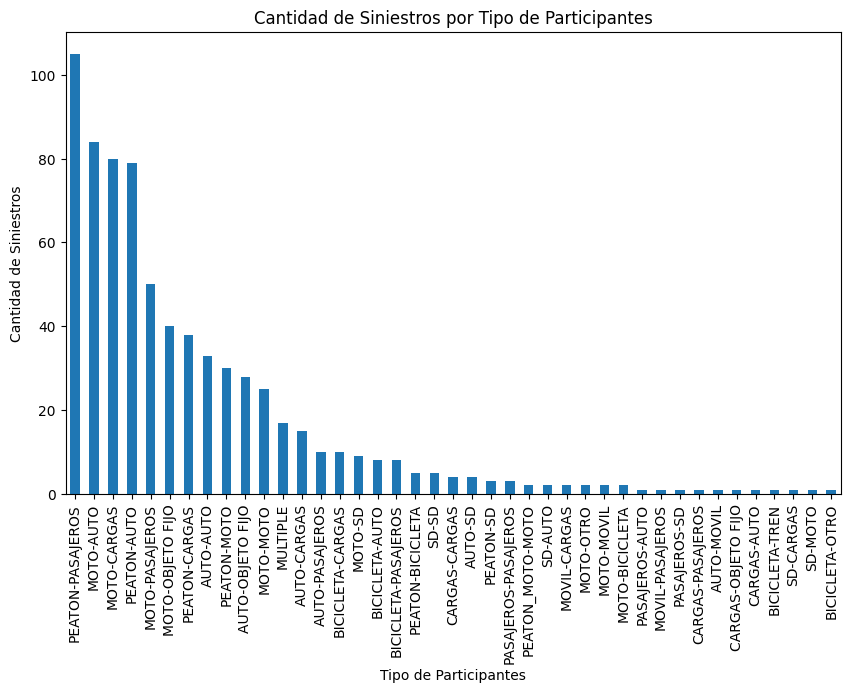

In [41]:
siniestros_por_participantes = homicidios['participantes'].value_counts()

# Graficar la cantidad de siniestros por tipo de participantes
siniestros_por_participantes.plot(kind='bar', figsize=(10, 6))
plt.title('Cantidad de Siniestros por Tipo de Participantes')
plt.xlabel('Tipo de Participantes')
plt.ylabel('Cantidad de Siniestros')
plt.show()

El gráfico de barras muestra la cantidad de siniestros según el tipo de participantes involucrados. La visualización proporciona una representación clara de la distribución de siniestros entre los diferentes tipos de participantes.

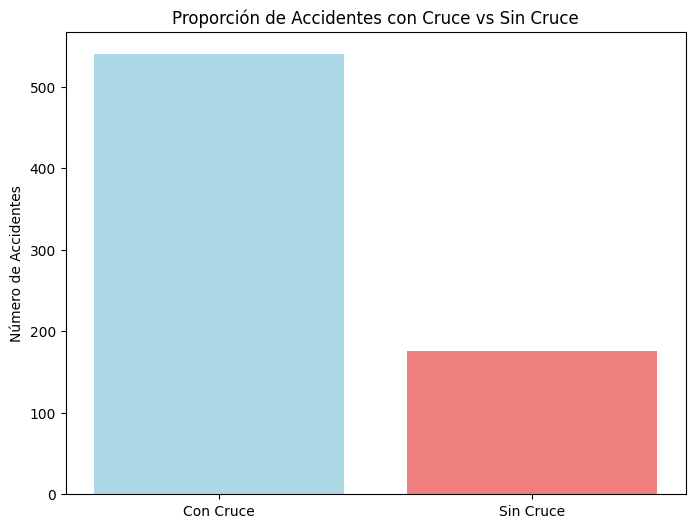

Proporción de Accidentes con Cruce respecto a Sin Cruce: 3.07


In [42]:
# Contar la frecuencia de valores en la columna 'cruce'
frecuencia_cruce = homicidios['cruce'].value_counts()

# Obtener la frecuencia de 'SinCruce'
sin_cruce = frecuencia_cruce.get('SinCruce', 0)

# Calcular la proporción de accidentes con cruce con respecto a SinCruce
con_cruce = frecuencia_cruce.sum() - sin_cruce
proporcion_con_cruce = con_cruce / sin_cruce

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(['Con Cruce', 'Sin Cruce'], [con_cruce, sin_cruce], color=['lightblue', 'lightcoral'])
plt.title('Proporción de Accidentes con Cruce vs Sin Cruce')
plt.ylabel('Número de Accidentes')
plt.show()

print(f"Proporción de Accidentes con Cruce respecto a Sin Cruce: {proporcion_con_cruce:.2f}")


La proporción de accidentes con cruce respecto a los sin cruce es de aproximadamente 3.07. Esto significa que, en el conjunto de datos analizado, hay alrededor de 3 veces más accidentes que ocurren en cruces en comparación con aquellos que ocurren fuera de cruces (sin cruce). El gráfico de barras complementa esta información al mostrar visualmente la diferencia en el número de accidentes entre estas dos categorías.

In [43]:
homicidios.to_csv("data/homicidios_clean.csv", index=False)

## **DESARROLLANDO LOS KPI**

## **KPI 1**

### **Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.**

Definimos a la tasa de homicidios en siniestros viales como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico. Su fórmula es: (Número de homicidios en siniestros viales / Población total) * 100,000



In [44]:
# Función para calcular el KPI del semestre
def calcular_tasa_victimas(semestre_df, poblacion=3000000):
    total_victimas = semestre_df['n_victimas'].sum()
    tasa_victimas = (total_victimas / poblacion) * 100000
    return tasa_victimas

# Lista para almacenar los resultados de la tasa de víctimas
resultados_tasa_victimas = []

# Iterar a través de cada semestre
for año in range(homicidios['fecha'].dt.year.min(), homicidios['fecha'].dt.year.max() + 1):
    for mes_inicio in [1, 7]:
        fecha_inicio = pd.Timestamp(año, mes_inicio, 1)
        fecha_fin = fecha_inicio + pd.DateOffset(months=6)
        
        # Filtrar los datos para el semestre actual
        semestre_df = homicidios[(homicidios['fecha'] >= fecha_inicio) & (homicidios['fecha'] < fecha_fin)]
        # Calcular la tasa de víctimas
        tasa_victimas_semestre = calcular_tasa_victimas(semestre_df)
        # Obtener la cantidad total de víctimas en el semestre actual
        total_victimas_semestre = semestre_df['n_victimas'].sum()
        # Crear etiquetas de año y semestre
        etiqueta_semestre = f'Año {año}, Semestre {1 if mes_inicio == 1 else 2}'
        # Agregar los resultados a la lista
        resultados_tasa_victimas.append((fecha_inicio, etiqueta_semestre, total_victimas_semestre, tasa_victimas_semestre))

# Crear DataFrame con los resultados de la tasa de víctimas
tasa_victimas_df = pd.DataFrame(resultados_tasa_victimas, columns=['Fecha_Inicio_Semestre', 'Etiqueta', 'Total_Víctimas', 'Tasa_Víctimas'])

tasa_victimas_df

,Fecha_Inicio_Semestre,Etiqueta,Total_Víctimas,Tasa_Víctimas
0,2016-01-01,"Año 2016, Semestre 1",67,2.233333
1,2016-07-01,"Año 2016, Semestre 2",82,2.733333
2,2017-01-01,"Año 2017, Semestre 1",81,2.700000
3,2017-07-01,"Año 2017, Semestre 2",79,2.633333
4,2018-01-01,"Año 2018, Semestre 1",76,2.533333
5,2018-07-01,"Año 2018, Semestre 2",85,2.833333
6,2019-01-01,"Año 2019, Semestre 1",59,1.966667
7,2019-07-01,"Año 2019, Semestre 2",47,1.566667
8,2020-01-01,"Año 2020, Semestre 1",31,1.033333
9,2020-07-01,"Año 2020, Semestre 2",56,1.866667


## **KPI 2**

### **Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.**

Definimos a la cantidad de accidentes mortales de motociclistas en siniestros viales como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que viajaban en moto en un determinado periodo temporal. Su fórmula para medir la evolución de los accidentes mortales con víctimas en moto es: (Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior) * 100

In [54]:
# Filtrado de datos: Crear un DataFrame solo con registros de homicidios relacionados con motocicletas
df_homicidios_moto = homicidios[homicidios['victima'] == 'MOTO']

# Agrupación y suma: Obtener la cantidad total de víctimas de homicidios en motocicletas por año
df_homicidios_moto = df_homicidios_moto.groupby(['año'])['n_victimas'].sum().reset_index()

# Creación de columnas adicionales:
# 1. 'N_VICTIMAS_ANTERIOR': Número de víctimas en el año anterior utilizando la función shift
df_homicidios_moto['n_victimas_anterior'] = df_homicidios_moto['n_victimas'].shift(periods=1, fill_value=0)

# 2. 'VARIACION_VICTIMAS_MOTO': Calculo de la variación porcentual en el número de víctimas de un año a otro
df_homicidios_moto['variacion_victimas'] = (df_homicidios_moto['n_victimas'] - df_homicidios_moto['n_victimas_anterior']) / df_homicidios_moto['n_victimas_anterior'] * 100

# Lidiar con valores infinitos o negativos infinitos reemplazándolos con 0
df_homicidios_moto['variacion_victimas'] = df_homicidios_moto['variacion_victimas'].replace([np.inf, -np.inf], 0)

# Función de limpieza: Redondear el valor en la columna 'VARIACION_VICTIMAS_MOTO' a dos decimales
def clean_data(df_homicidios_moto):
    df_homicidios_moto = df_homicidios_moto.round({'variacion_victimas': 2})
    return df_homicidios_moto

# Aplicar la función de limpieza al DataFrame
df_homicidios_moto = clean_data(df_homicidios_moto.copy())

# Visualizar los primeros registros del DataFrame resultante
df_homicidios_moto



,año,n_victimas,n_victimas_anterior,variacion_victimas
0,2016,67,0,0.00
1,2017,62,67,-7.46
2,2018,61,62,-1.61
3,2019,50,61,-18.03
4,2020,30,50,-40.00
5,2021,46,30,53.33


In [46]:
tasa_victimas_df.to_csv("data/kpi1.csv", index=False)

In [55]:
df_homicidios_moto.to_csv("data/kpi2.csv", index=False)